In [1]:
from seaborn import load_dataset

In [21]:
df = load_dataset('tips')

In [22]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
X=df.iloc[:,1:] ## independent features
y=df.iloc[:,-7]

In [24]:
y.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [26]:
Dummy=pd.get_dummies(X,columns=["sex","smoker","day","time"],drop_first=True)

<IPython.core.display.Javascript object>

In [27]:
X=pd.concat([X,Dummy],axis=1)

<IPython.core.display.Javascript object>

In [31]:
X.head()

,tip,size,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1.01,2,1.01,2,1,1,0,0,1,1
1,1.66,3,1.66,3,0,1,0,0,1,1
2,3.50,3,3.50,3,0,1,0,0,1,1
3,3.31,2,3.31,2,0,1,0,0,1,1
4,3.61,4,3.61,4,1,1,0,0,1,1


In [30]:
X=X.drop(["sex","smoker","day","time"],axis=1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [36]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 6, kernel_initializer='he_uniform',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 133,699
Trainable params: 133,699
Non-trainable params: 0
_________________________________________________________________
Train on 113 samples, validate on 57 samples
Epoch 1/100
113/113 [==============================] - 3s 31ms/sample -

In [37]:
prediction=NN_model.predict(X_test)

In [38]:
y_test

64     17.59
63     18.29
55     19.49
111     7.25
225    16.27
       ...  
90     28.97
101    15.38
75     10.51
4      24.59
109    14.31
Name: total_bill, Length: 74, dtype: float64

<IPython.core.display.Javascript object>

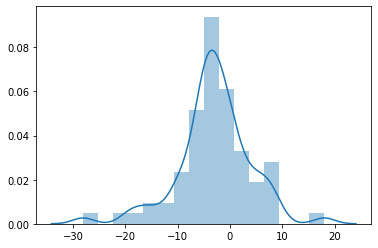

In [39]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

<IPython.core.display.Javascript object>

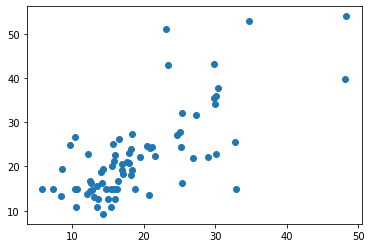

In [40]:
plt.scatter(y_test,prediction)

In [41]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5.624505471925478
MSE: 57.527031986687405


<IPython.core.display.Javascript object>

RMSE: 7.584657671028232


In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5.624505471925478
MSE: 57.527031986687405


<IPython.core.display.Javascript object>

RMSE: 7.584657671028232
